## Part 1: Load data + see what each file entails

In [4]:
# upload zip file

from google.colab import files
uploaded = files.upload()


Saving ctu-chb-intrapartum-cardiotocography-database-1.0.0 (1) (1).zip to ctu-chb-intrapartum-cardiotocography-database-1.0.0 (1) (1).zip


In [6]:
import zipfile
import os

# Use the correct zip file name
zip_file_name = "ctu-chb-intrapartum-cardiotocography-database-1.0.0 (1) (1).zip"

# Create the folder for extraction
extract_path = '/content/unzipped_files'
os.makedirs(extract_path, exist_ok=True)

# Extract the zip file
with zipfile.ZipFile(zip_file_name, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# List all files and subdirectories to check what was extracted
for root, dirs, files in os.walk(extract_path):
    print("Directory:", root)
    print("Subdirectories:", dirs)
    print("Files:", files)
    print("-" * 40)



Directory: /content/unzipped_files
Subdirectories: ['ctu-chb-intrapartum-cardiotocography-database-1.0.0']
Files: []
----------------------------------------
Directory: /content/unzipped_files/ctu-chb-intrapartum-cardiotocography-database-1.0.0
Subdirectories: []
Files: ['1442.dat', '1201.dat', '1350.hea', '1311.dat', '1075.hea', '1241.hea', '1204.hea', '1369.hea', '1392.dat', '1133.dat', '1455.dat', '1042.dat', '1073.hea', '1035.dat', '1149.hea', '1085.dat', '1348.hea', '2003.hea', '1262.dat', '1001.dat', '1282.hea', '1437.hea', '1269.dat', '1256.dat', '1399.dat', '1082.hea', '1375.dat', '1342.dat', '1409.dat', '1409.hea', '1473.dat', '1238.hea', '1040.hea', '1242.hea', '1254.dat', '1188.dat', '1303.dat', '2016.dat', '1466.hea', '1395.dat', '1498.hea', '1319.dat', '1179.dat', '1384.dat', '1202.dat', '1442.hea', '1016.dat', '1268.hea', '1231.hea', '1141.hea', '1172.hea', '1185.hea', '1346.dat', '1377.hea', '1342.hea', '1013.dat', '1386.dat', '1393.dat', '1493.dat', '1180.dat', '1451.da

In [7]:
# Example: read a specific .hea file
# Define the path to a .hea file (example: 1206.hea)
hea_file_path = '/content/unzipped_files/ctu-chb-intrapartum-cardiotocography-database-1.0.0/1206.hea'

# Open and read the contents of the .hea file
with open(hea_file_path, 'r') as file:
    hea_content = file.read()
    print(hea_content)


1206 2 4 18000
1206.dat 16 100(0)/bpm 12 0 0 -1407 0 FHR
1206.dat 16 100/nd 12 0 0 16478 0 UC

#----- Additional parameters for record 1206

#-- Outcome measures
#pH           7.24
#BDecf        2.06
#pCO2         7.7
#BE           -4
#Apgar1       9
#Apgar5       10

#-- !NotReadyYet! Neonatology outcome measures !NotReadyYet!
#NICU days    0
#Seizures     0
#HIE          0
#Intubation   0
#Main diag.   0
#Other diag.  0

#-- Fetus/Neonate descriptors
#Gest. weeks  41
#Weight(g)    3250
#Sex          2

#-- Maternal (risk-)factors
#Age          25
#Gravidity    1
#Parity       0
#Diabetes     0
#Hypertension 0
#Preeclampsia 0
#Liq. praecox 0
#Pyrexia      0
#Meconium     0

#-- Delivery descriptors
#Presentation 1
#Induced      0
#I.stage      276
#NoProgress   0
#CK/KP        0
#II.stage     15
#Deliv. type  1

#-- Signal information
#dbID         1049205
#Rec. type    1
#Pos. II.st.  14400
#Sig2Birth    0


In [9]:
!pip install wfdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.0/160.0 kB 3.1 MB/s eta 0:00:00


[[ 0.  38. ]
 [ 0.  37.5]
 [ 0.  39. ]
 [ 0.  40. ]
 [ 0.  41. ]
 [ 0.  42. ]
 [ 0.  43. ]
 [ 0.  42.5]
 [ 0.  42. ]
 [ 0.  41.5]]


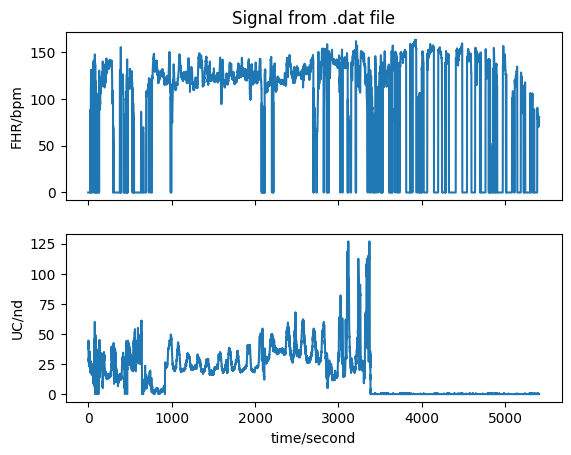

In [10]:
import wfdb

record_name = '/content/unzipped_files/ctu-chb-intrapartum-cardiotocography-database-1.0.0/1463'

# Read the record (this will read both the .dat and .hea files automatically)
record = wfdb.rdrecord(record_name)

# Display the signal data (print only the first 10 rows to keep it manageable)
print(record.p_signal[:10])

# Plot the signals
wfdb.plot_wfdb(record=record, title='Signal from .dat file')


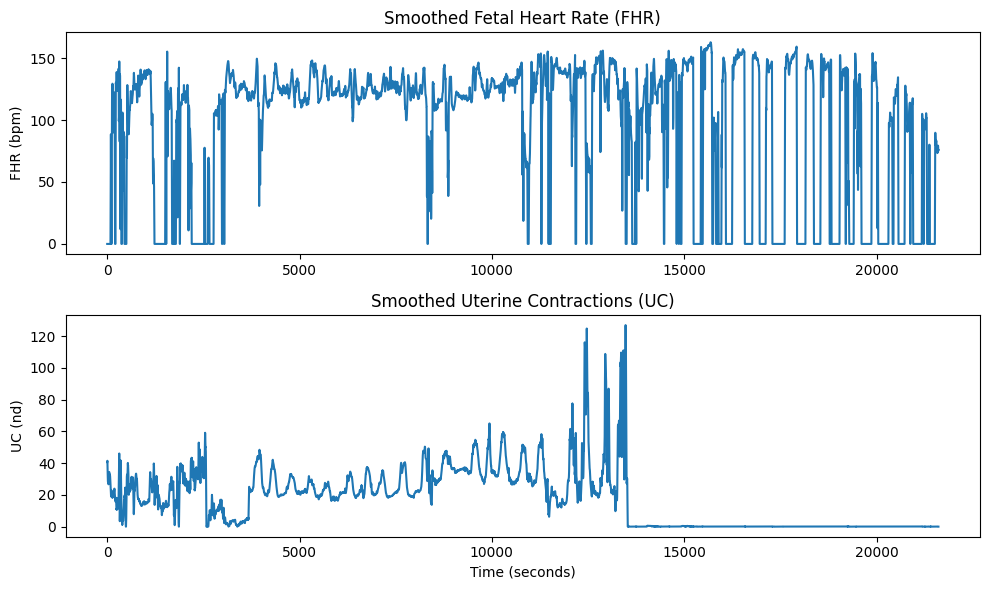

In [11]:
# make data easier to read

import numpy as np
import matplotlib.pyplot as plt

# Define a function to apply a moving average
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Apply moving average to smooth the FHR and UC signals
smoothed_fhr = moving_average(record.p_signal[:, 0], window_size=10)  # FHR
smoothed_uc = moving_average(record.p_signal[:, 1], window_size=10)   # UC

# Plot the smoothed signals
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(smoothed_fhr)
plt.title('Smoothed Fetal Heart Rate (FHR)')
plt.ylabel('FHR (bpm)')

plt.subplot(2, 1, 2)
plt.plot(smoothed_uc)
plt.title('Smoothed Uterine Contractions (UC)')
plt.xlabel('Time (seconds)')
plt.ylabel('UC (nd)')

plt.tight_layout()
plt.show()



### Visuals (Raw Data)

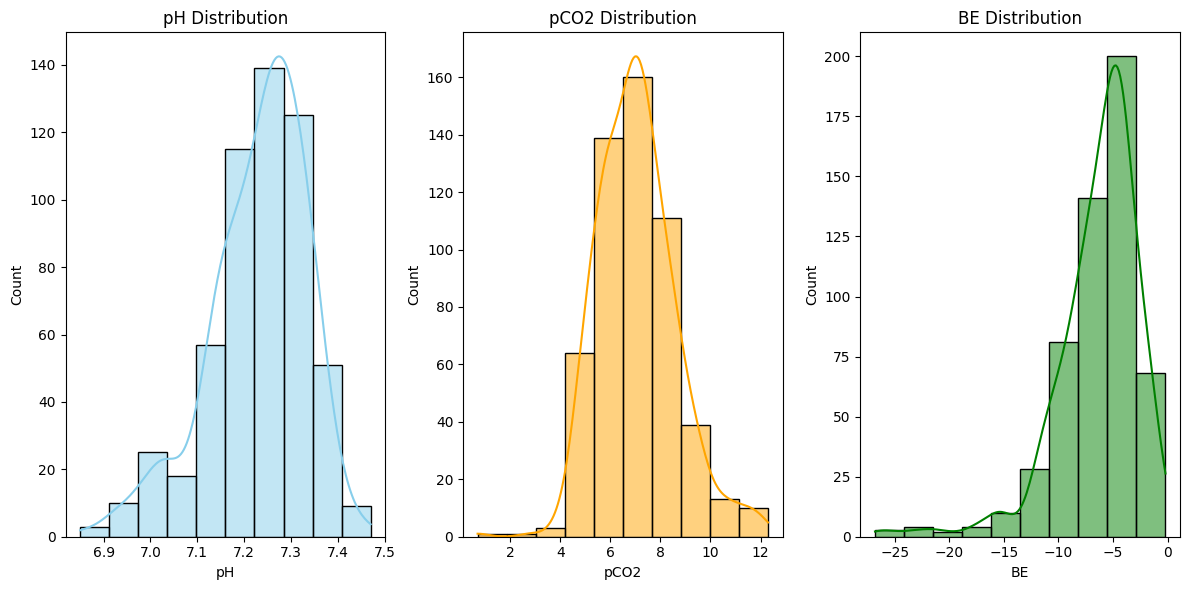

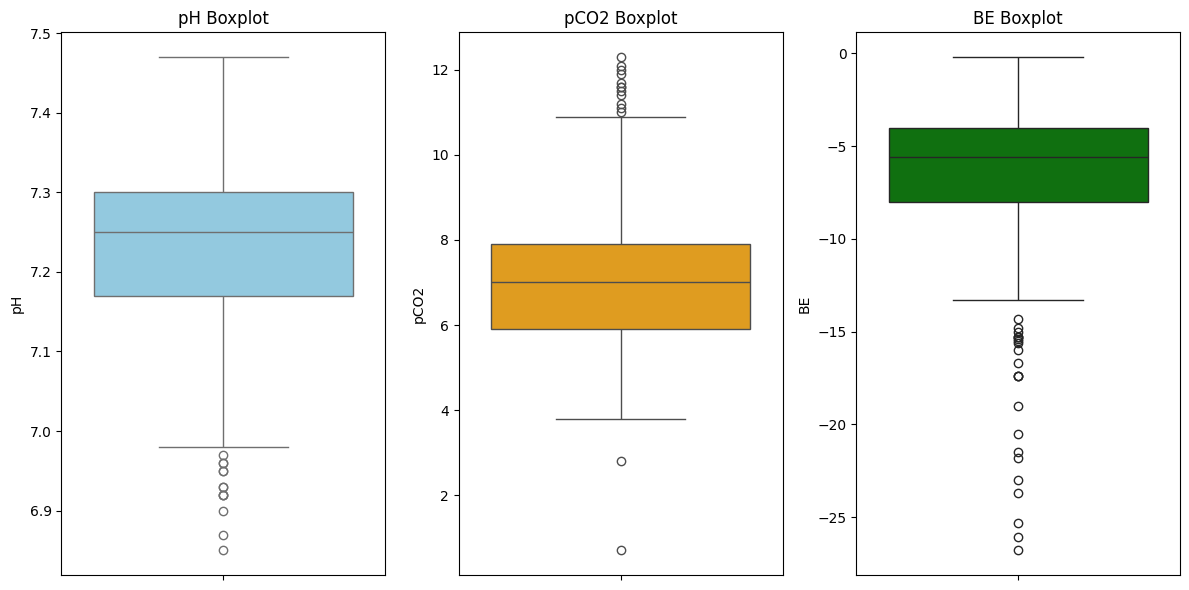

In [79]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the directory where your .hea files are located
hea_files_directory = '/content/unzipped_files/ctu-chb-intrapartum-cardiotocography-database-1.0.0'

# List to store the contents of all .hea files
data = []

# Loop through all files in the directory
for filename in os.listdir(hea_files_directory):
    if filename.endswith('.hea'):  # Check if the file is a .hea file
        file_path = os.path.join(hea_files_directory, filename)  # Get the full path
        with open(file_path, 'r') as file:
            lines = file.readlines()  # Read lines from the file
            # Initialize variables for pH, pCO2, BE
            pH, pCO2, BE = None, None, None

            # Loop through lines to extract relevant data
            for line in lines:
                if line.startswith('#pH'):
                    pH = float(line.split()[1])
                elif line.startswith('#pCO2'):
                    pCO2 = float(line.split()[1])
                elif line.startswith('#BE'):
                    BE = float(line.split()[1])

            # Append the extracted data as a dictionary
            if pH is not None and pCO2 is not None and BE is not None:
                data.append({'pH': pH, 'pCO2': pCO2, 'BE': BE})

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Check if DataFrame is empty
if df.empty:
    print("No relevant data found in .hea files.")
else:
    # Plot histograms for pH, pCO2, and BE
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    sns.histplot(df['pH'], bins=10, kde=True, color='skyblue')
    plt.title('pH Distribution')

    plt.subplot(1, 3, 2)
    sns.histplot(df['pCO2'], bins=10, kde=True, color='orange')
    plt.title('pCO2 Distribution')

    plt.subplot(1, 3, 3)
    sns.histplot(df['BE'], bins=10, kde=True, color='green')
    plt.title('BE Distribution')

    plt.tight_layout()
    plt.show()

    # Plot boxplots for pH, pCO2, and BE
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 3, 1)
    sns.boxplot(df['pH'], color='skyblue')
    plt.title('pH Boxplot')

    plt.subplot(1, 3, 2)
    sns.boxplot(df['pCO2'], color='orange')
    plt.title('pCO2 Boxplot')

    plt.subplot(1, 3, 3)
    sns.boxplot(df['BE'], color='green')
    plt.title('BE Boxplot')

    plt.tight_layout()
    plt.show()


## Part 2: Replicating Preprocessing Code (In Progress)


In [12]:
# install relevant packages

!pip install pqdm
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install fire
!pip install pyarrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114250 sha256=b41aeefc9eb0b19b881dcbf6d1ca3d3b5dc1ec083de9120434bc3014898a9e6f
  Stored in directory: /root/.cache/pip/wheels/19/39/2f/2d3cadc408a8804103f1c34ddd4b9f6a93497b11fa96fe738e
Successfully built fire


In [38]:
# upload utils.py
from google.colab import files
uploaded = files.upload()

Saving utils.py to utils (1).py


In [39]:
# upload CTU preprocess
from google.colab import files
uploaded = files.upload()

Saving preprocess_data.py to preprocess_data (1).py


In [53]:
!ls /content

'ctu-chb-intrapartum-cardiotocography-database-1.0.0 (1) (1).zip'   __pycache__   unzipped_files
 preprocess_data.py						    sample_data   utils.py


In [58]:
import zipfile
import os

zip_path = 'ctu-chb-intrapartum-cardiotocography-database-1.0.0 (1) (1).zip'
extract_path = './ctu_data/'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Extraction complete.")


Extraction complete.


In [60]:
!ls

'ctu-chb-intrapartum-cardiotocography-database-1.0.0 (1) (1).zip'   processed_data   unzipped_files
 ctu_data							    __pycache__      utils.py
 preprocess_data.py						    sample_data


In [59]:
from preprocess_data import run

# Adjust the paths for your data
data_dir = './ctu_data/'  # The directory where the data is extracted
save_dir = './processed_data/'  # Where to save the filtered data

# Run the preprocessing code
run(
    sample_limit=1000,
    sample_rate=0.25,
    data_dir=data_dir,
    save_dir=save_dir,
    n_jobs=10,
    horizon=0,
    window=60,
    missingness=0.3,
)

sample_limit = 1000
save_dir = ./processed_data/
n_jobs = 10
debug = False
seed = 42
split = 0.1812
data_dir = ./ctu_data/
horizon = 0
missingness = 0.3
sample_rate = 0.25
window = 60
found 0 files
training filename: ./processed_data//MFM_CTU_all.sample_limit-all.sample_rate-025.horizon-0.window-60.missingness-30


FileNotFoundError: [Errno 2] No such file or directory: './ctu_data/labels.csv'

In [ ]:
import sys
sys.path.append('/path/to/preprocess_data_directory')
from preprocess_data import some_function

In [54]:
import sys
sys.path.append('/content')

from utils import smooth
import preprocess_data

having issues w/ code versions + panda edition + printing. revisit.